In [2]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2); library(gridExtra)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘gridExtra’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:dplyr’:

    combine


  res = super(Functio

array(['gridExtra', 'ggplot2', 'dplyr', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [71]:
from __future__ import print_function
import os
import os.path as op
from itertools import groupby
from collections import defaultdict
import subprocess

if op.exists("./synteny_panel_plots") == False:
    os.mkdir("./synteny_panel_plots")

In [11]:
group_names = ["group"+str(i) for i in range(1,19)]

with open("phage_by_group.txt") as prelim_groups:
    phage_grp = {}
    phages = []
    groups = []
    for line in prelim_groups:
        line = line.rstrip("\n")
        vec = line.split("\t")
        phage_grp[vec[0]] = vec[1]
        phages.append(vec[0])
        groups
    groups = list(phage_grp.values())
    phages = list(phage_grp.keys())

phagepre = []
phage_reps = []
phage_rep_suffix = defaultdict(lambda: [])


for p in phages:
    pre = ".".join(p.split(".")[0:2])
    if pre not in phagepre:
        phagepre.append(pre)
    else:
        phage_reps.append(pre)
        
repgroups = []

for r in phage_reps:
    for g in phage_grp.keys():
        if r in g:
            repgroups.append(phage_grp[g].split(":")[-1])
            break

for p in phages:
    pre = ".".join(p.split(".")[0:2])
    suffix = p.split(".")[-2]
    if pre in phage_reps:
        phage_rep_suffix[pre].append(suffix)
print(phage_rep_suffix)
print(zip(phage_reps, repgroups))

defaultdict(<function <lambda> at 0x10a662668>, {'1.247': ['B', 'A'], '2.159': ['B', 'A'], '1.233': ['B', 'A'], '1.283': ['A', 'C', 'B'], '1.118': ['B', 'A'], '1.268': ['A', 'B'], '1.115': ['B', 'A'], '1.263': ['B', 'A'], '1.139': ['B', 'A'], '2.095': ['B', 'A'], '1.111': ['A', 'B'], '1.021': ['A', 'B', 'C'], '1.189': ['B', 'O', 'C'], '1.188': ['A', 'B', 'C'], '1.034': ['O', 'X'], '1.237': ['B', 'A'], '1.217': ['O', 'Y'], '1.238': ['A', 'B'], '1.215': ['B', 'A'], '1.214': ['O', 'Y'], '1.211': ['A', 'B'], '1.249': ['B', 'A'], '1.107': ['B', 'C', 'A'], '1.122': ['A', 'B'], '1.277': ['A', 'B'], '1.271': ['B', 'A'], '1.270': ['B', 'A'], '1.198': ['B', 'A'], '1.199': ['B', 'A']})
[('1.189', '6'), ('1.238', '5'), ('1.271', '4'), ('1.107', '15'), ('1.277', '4'), ('1.215', '10'), ('1.189', '6'), ('1.214', '9'), ('1.198', '1'), ('1.199', '1'), ('1.249', '15'), ('1.247', '9'), ('1.118', '4'), ('1.211', '9'), ('1.283', '4'), ('1.122', '9'), ('1.237', '4'), ('1.270', '4'), ('1.115', '6'), ('1.188'

In [77]:
# python functions to run last:
class Replicates():
    def __init__(self, name, query, sub):
        self.name = name
        self.query = query
        self.sub = sub
        self.bqfasta = "./step1contig1/{name}.{query}.step1.contig1.fasta".format(**locals())
        self.bsfasta = "./step1contig1/{name}.{sub}.step1.contig1.fasta".format(**locals())
        self.fqfasta = "./final_fastas_bp/{name}.{query}.final.fasta".format(**locals())
        self.fsfasta = "./final_fastas_bp/{name}.{sub}.final.fasta".format(**locals())
        self.mafbefore = "./last_aln/{name}_before.maf".format(name=name)
        self.mafdotbefore = "./last_aln/{name}_{query}{sub}_before_dottbl.txt".format(**locals())
        self.mafafter = "./last_aln/{name}_after.maf".format(name=name)
        self.mafdotafter = "./last_aln/{name}_{query}{sub}_after_dottbl.txt".format(**locals())

    def run_last(self):
        cmd1 = "lastdb {self.name}_before {self.bqfasta}".format(**locals())
        cmd2 = "lastal {self.name}_before {self.bsfasta} > {self.mafbefore}".format(**locals())
        cmd3 = "lastdb {self.name}_after {self.fqfasta}".format(**locals())
        cmd4 = "lastal {self.name}_after {self.fsfasta} > {self.mafafter}".format(**locals())
        subprocess.call(cmd1, shell=True)
        subprocess.call(cmd2, shell=True)
        subprocess.call(cmd3, shell=True)
        subprocess.call(cmd4, shell=True)
        print("last successfully run for {self.name}".format(**locals()))
        maf_to_tbl(self.mafbefore, self.mafdotbefore, self.query, self.sub, self.bqfasta, self.bsfasta)
        maf_to_tbl(self.mafafter, self.mafdotafter, self.query, self.sub, self.fqfasta, self.fsfasta)
        print("maf tables converted to list for {self.name}".format(**locals()))

# python functions to create a synteny table from maf output:
def read_fasta(file_handle):
    '''Fasta iterator'''
    for header, group in groupby(file_handle, lambda line: line[0] == '>'):
        if header:
            line = next(group)
            name = line[1:].strip()
        else:
            seq = ''.join(line.strip() for line in group)
            yield name, seq

def get_fasta_len(fasta):
    genome_len = 0
    with open(fasta) as ih:
        for name, seq in read_fasta(ih):
            genome_len += len(seq)
    return genome_len

def real_start(start, glen, strand):
    if strand == "+":
        rs = start + 1
    if strand == "-":
        rs = glen - (start+1)
    return rs

def advance_seq(location, strand):
    if strand == "+":
        location += 1
    elif strand == "-":
        location -= 1
    else:
        print("strand not designated!")
        raise IOError
    return location

def maf_to_tbl(maf, outfile, query, subject, query_fasta, subject_fasta):
    with open(outfile, "w") as oh:
        print(query, subject, "match", sep="\t", file=oh)
        ih = [i for i in open(maf).readlines() if i.startswith("#")==False and len(i.split())>1]
        qlen = get_fasta_len(query_fasta)
        slen = get_fasta_len(subject_fasta)
        for i in range(0, len(ih), 3):
            scores = ih[i]
            aln1 = ih[i+1]
            #print(aln1.split()[0:3])
            aln2 = ih[i+2]
            #print(aln2.split()[0:3])

            strand1 = aln1.split()[4]
            start1 = real_start(int(aln1.split()[2]), qlen, strand1)
            seq1 = aln1.split()[-1]

            strand2 = aln2.split()[4]
            start2 = real_start(int(aln2.split()[2]), slen, strand2)
            seq2 = aln2.split()[-1]
            for i, (n1, n2) in enumerate(zip(seq1, seq2)):
                start1 = advance_seq(start1, strand1)
                start2 = advance_seq(start2, strand2)
                print(start1, start2, compare_seqs(n1,n2), sep="\t", file=oh)
        for i in range(0, qlen):
            print(i,"NA", 0, sep="\t", file=oh)
        for i in range(0, slen):
            print("NA",i,0,sep="\t", file=oh)
    return outfile

def compare_seqs(n1, n2):
    if n1 == n2:
        return 1
    else:
        return 0

In [78]:
prs = phage_rep_suffix
for name in prs:
    if len(prs[name]) == 2 and "X" in prs[name] or "Y" in prs[name]:
        continue
    else:
        query = phage_rep_suffix[name]
        obj = Replicates(name, phage_rep_suffix[name][0], phage_rep_suffix[name][1])
        obj.run_last()

last successfully run for 1.247
maf tables converted to list for 1.247
last successfully run for 2.159
maf tables converted to list for 2.159
last successfully run for 1.233
maf tables converted to list for 1.233
last successfully run for 1.283
maf tables converted to list for 1.283
last successfully run for 1.118
maf tables converted to list for 1.118
last successfully run for 1.268
maf tables converted to list for 1.268
last successfully run for 1.115
maf tables converted to list for 1.115
last successfully run for 1.263
maf tables converted to list for 1.263
last successfully run for 1.139
maf tables converted to list for 1.139
last successfully run for 2.095
maf tables converted to list for 2.095
last successfully run for 1.111
maf tables converted to list for 1.111
last successfully run for 1.021
maf tables converted to list for 1.021
last successfully run for 1.189
maf tables converted to list for 1.189
last successfully run for 1.188
maf tables converted to list for 1.188
last s

In [150]:
%%R
plot_synteny <- function(tbl, sname, qname){
    dott <- read.table(tbl, sep="\t", header=TRUE)
    colnames(dott)[c(1,2)] = c("query", "subject")
    smax1 = max(dott$subject)
    qmax1 = max(dott$query)
    dp1 <- ggplot(dott, aes(query, subject)) + geom_point(data = filter(dott, match==1), size=.5, aes(query, subject)) + theme_bw()
    dp1 + labs(x=paste(qname, "contig position"), y=paste(sname, "contig position")) -> dp1
    return(dp1)
}

plot_coverage <- function(coverage_tbl, name){
    tbl <- read.table(coverage_tbl, sep="\t")
    covplot <- tbl %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw()
    return(covplot)
}

In [340]:
%%R

plot_grid <- function(item, query, sub){
    maf_before <- paste("./last_aln/",item,"_",query,sub,"_before_dottbl.txt", sep="")
    maf_after <- paste("./last_aln/",item,"_",query,sub,"_after_dottbl.txt", sep="")
    beforeA <- paste("step1contig1/cov/",item,".",query,".step1.contig1.genomecoverage.txt",sep="")
    afterA <- paste("coverage_plots_post","/",item,".",query,".final.clc.genomecoverage",sep="")
    beforeB <- paste("step1contig1/cov/",item,".", sub,".step1.contig1.genomecoverage.txt",sep="")
    afterB <- paste("coverage_plots_post","/",item,".",sub,".final.clc.genomecoverage",sep="")
    print(beforeA)
    sname <- paste(item, sub, sep=".")
    qname <- paste(item, query, sep=".")
    
    dph = 10
    lhs = 5
    rhs = 5
    bs = 0
    
    dp1 <- plot_synteny(maf_before, sname, qname) + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt"))
    dp1 <- dp1 + ggtitle("C")
    dp2 <- plot_synteny(maf_after, sname, qname) + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt"))
    dp2 <- dp2 + ggtitle("F")
    bpA <- plot_coverage(beforeA, qname) + labs(y="Before\nread coverage", 
                                                x="") + ggtitle("A")
    bpA <- bpA + theme(plot.margin=grid::unit(c(dph,rhs,bs,lhs), "pt"))
                       #plot.title = element_text(hjust = -0.45))
    
    bpB <- plot_coverage(beforeB, sname) + theme(plot.margin=grid::unit(c(dph,rhs,bs,lhs), "pt")) 
    bpB <- bpB + labs(x="", y="", title="B")
    apA <- plot_coverage(afterA, qname) + labs(y="After\nread coverage", x=qname, title="D")
    apA <- apA + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt"))
    apB <- plot_coverage(afterB, sname) + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt")) 
    apB <- apB + labs(x=sname, y="", title="E")
    
    final <- grid.arrange(bpA, bpB, dp1, apA, apB, dp2,
             ncol = 3, nrow = 2, widths = c(8.5, 8, 8), heights = c(9,9))
    
    return(final)
}

In [336]:
phage_grp["1.111"+".A."]

'CNSv2.0:18'

[1] "step1contig1/cov/1.111.A.step1.contig1.genomecoverage.txt"


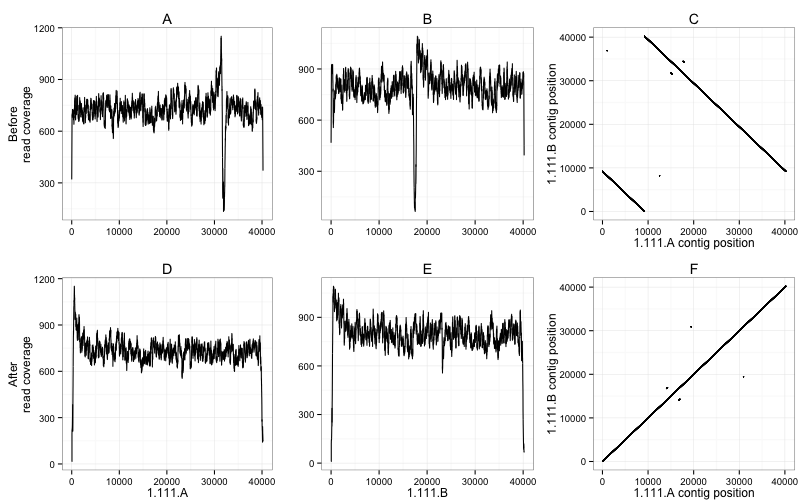

In [341]:
%%R -w 800 -h 500
out <- plot_grid("1.111", "A", "B")

In [266]:
if op.exists("coverage_panel_plots") == False:
    os.mkdir("coverage_panel_plots")

In [342]:
%%R
png(filename = "coverage_panel_plots/1.111_AB_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [343]:
phage_grp["1.107.B."]

'CNSv2.0:15'

## Group 15 reps

[1] "step1contig1/cov/1.107.B.step1.contig1.genomecoverage.txt"


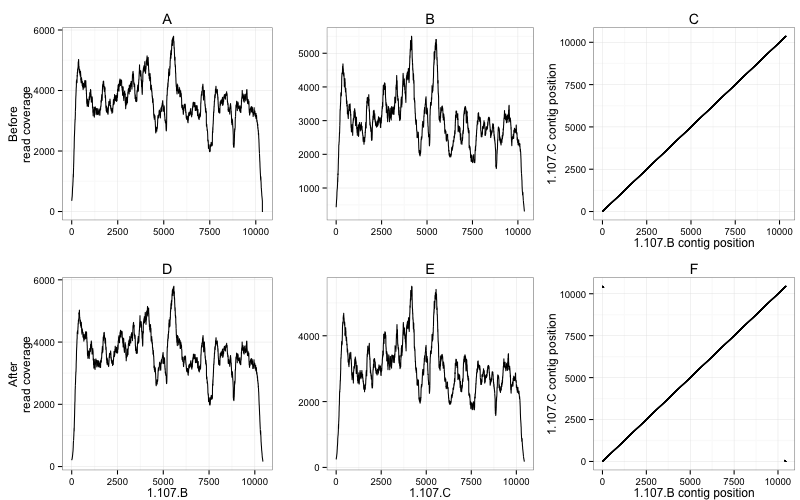

In [344]:
%%R -w 800 -h 500
out <- plot_grid("1.107", "B", "C")

In [345]:
%%R
png(filename = "coverage_panel_plots/1.107_BC_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [346]:
phage_grp["1.115.B."]

'CNSv2.0:6'

## Phage Group 6

[1] "step1contig1/cov/1.115.B.step1.contig1.genomecoverage.txt"


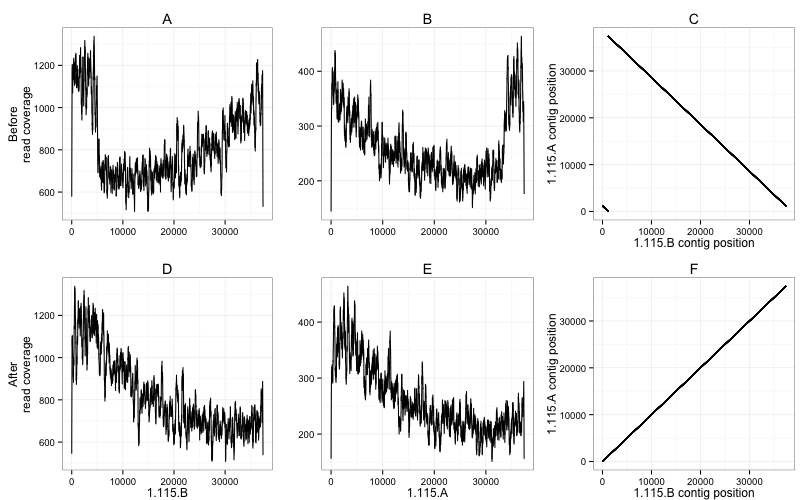

In [347]:
%%R -w 800 -h 500
out <- plot_grid("1.115", "B", "A")

In [348]:
%%R
png(filename = "coverage_panel_plots/1.115_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [349]:
phage_grp['1.118.B.']

'CNSv2.0:4'

## Phage group 4:

[1] "step1contig1/cov/1.118.B.step1.contig1.genomecoverage.txt"


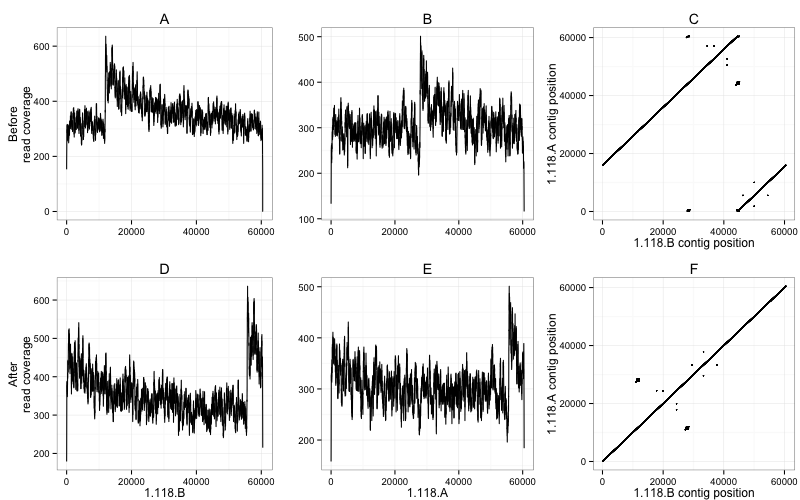

In [350]:
%%R -w 800 -h 500
out <- plot_grid("1.118", "B", "A")

In [351]:
%%R
png(filename = "coverage_panel_plots/1.118_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [352]:
phage_grp["1.122.A."]

'CNSv2.0:9'

## Phage Group 9

[1] "step1contig1/cov/1.122.A.step1.contig1.genomecoverage.txt"


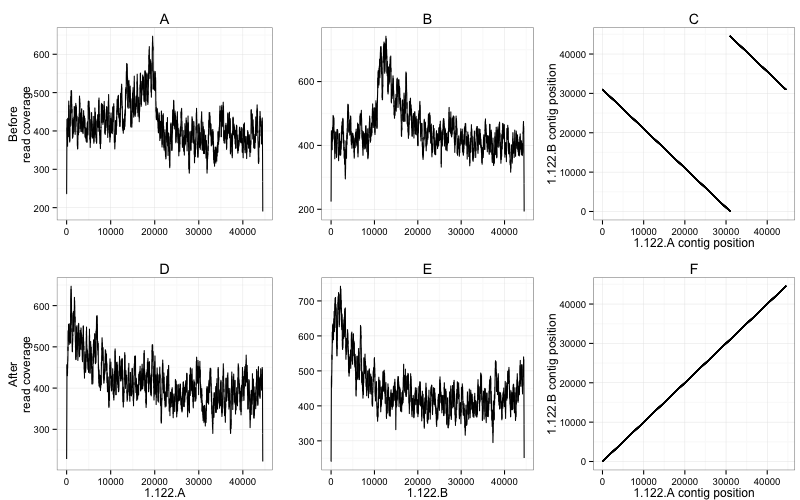

In [353]:
%%R -w 800 -h 500
out <- plot_grid("1.122", "A", "B")

In [354]:
%%R
png(filename = "coverage_panel_plots/1.122_AB_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [355]:
phage_grp["1.139.B."]

'CNSv2.0:8'

## phage group 8

[1] "step1contig1/cov/1.139.B.step1.contig1.genomecoverage.txt"


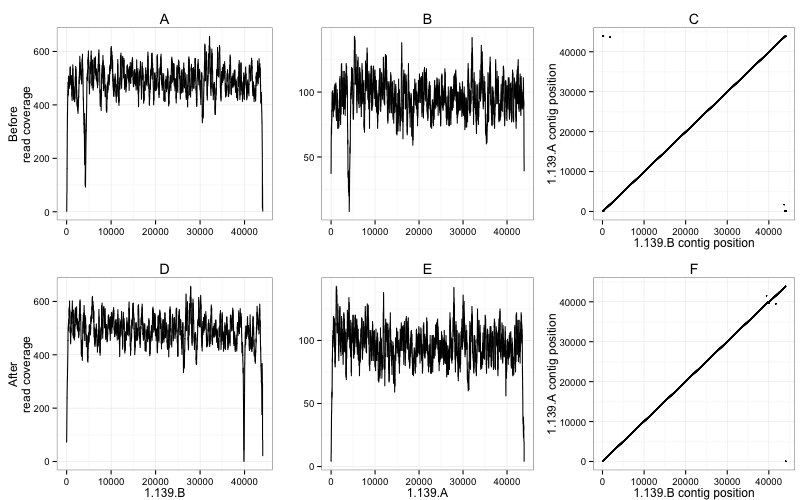

In [356]:
%%R -w 800 -h 500
out <- plot_grid("1.139", "B", "A")

In [357]:
%%R
png(filename = "coverage_panel_plots/1.139_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [358]:
phage_grp['1.188.A.']

'CNSv2.0:5'

## Phage group 5

[1] "step1contig1/cov/1.188.A.step1.contig1.genomecoverage.txt"


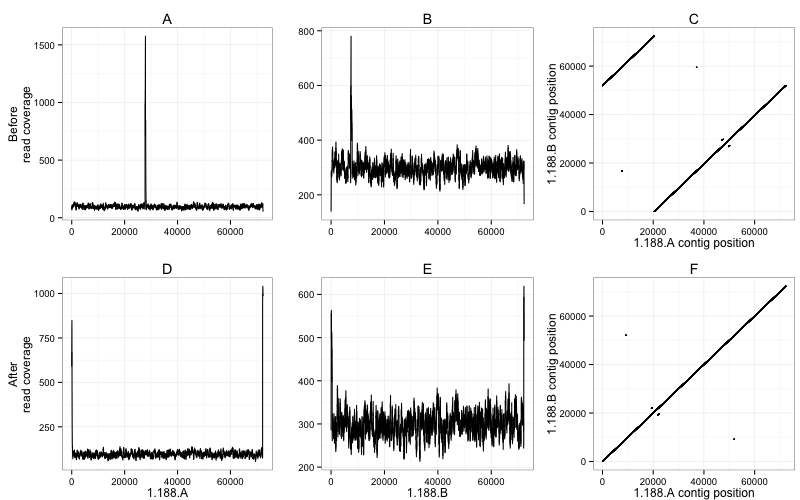

In [359]:
%%R -w 800 -h 500
out <- plot_grid("1.188", "A", "B")

In [360]:
%%R
png(filename = "coverage_panel_plots/1.188_AB_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [361]:
phage_grp['1.189.B.']

'CNSv2.0:6'

## Phage group 6

[1] "step1contig1/cov/1.189.B.step1.contig1.genomecoverage.txt"


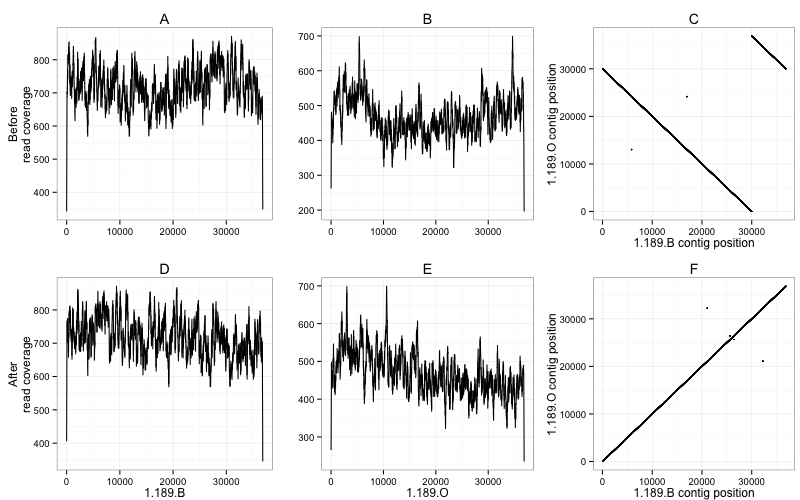

In [362]:
%%R -w 800 -h 500
out <- plot_grid("1.189", "B", "O")

In [363]:
%%R
png(filename = "coverage_panel_plots/1.189_BO_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [364]:
phage_grp["1.198.B."]

'CNSv2.0:1'

## phage group 1

[1] "step1contig1/cov/1.198.B.step1.contig1.genomecoverage.txt"


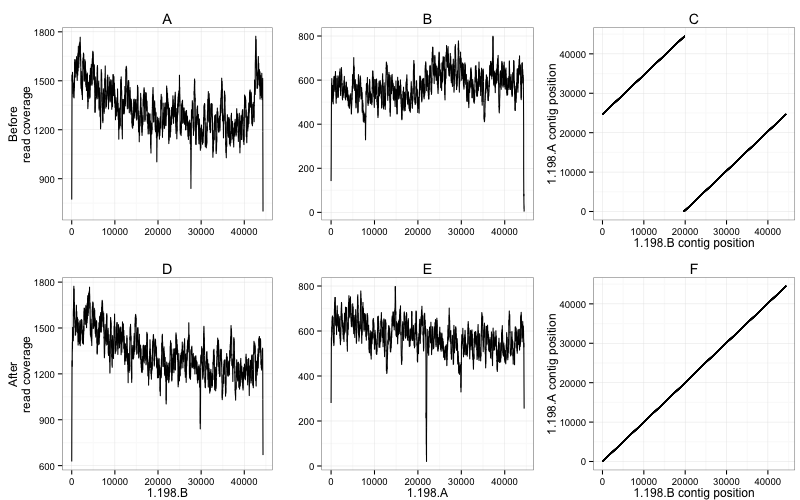

In [365]:
%%R -w 800 -h 500
out <- plot_grid("1.198", "B", "A")

In [366]:
%%R
png(filename = "coverage_panel_plots/1.198_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [367]:
phage_grp["1.199.B."]

'CNSv2.0:1'

## phage group 1

[1] "step1contig1/cov/1.199.B.step1.contig1.genomecoverage.txt"


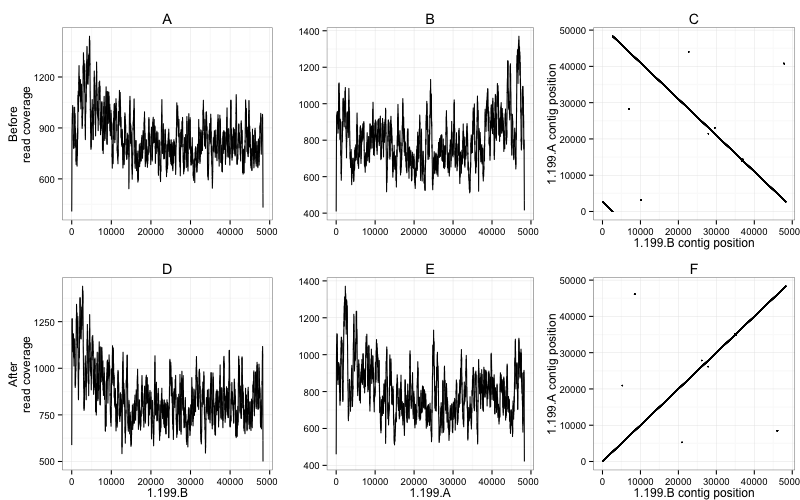

In [368]:
%%R -w 800 -h 500
out <- plot_grid("1.199", "B", "A")

In [369]:
%%R
png(filename = "coverage_panel_plots/1.199_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [370]:
phage_grp["1.211.A."]

'CNSv2.0:9'

## phage group 9

[1] "step1contig1/cov/1.211.A.step1.contig1.genomecoverage.txt"


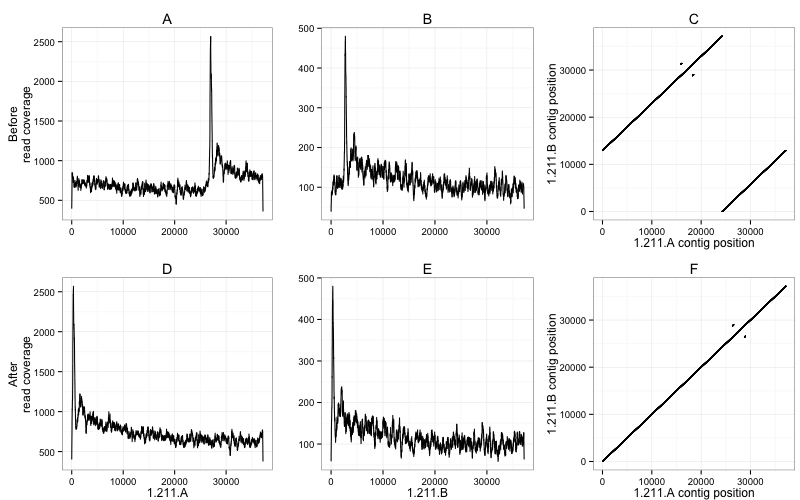

In [371]:
%%R -w 800 -h 500
out <- plot_grid("1.211", "A", "B")

In [372]:
%%R
png(filename = "coverage_panel_plots/1.211_AB_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [373]:
phage_grp["1.215.B."]

'CNSv2.0:10'

## phage group 10

[1] "step1contig1/cov/1.215.B.step1.contig1.genomecoverage.txt"


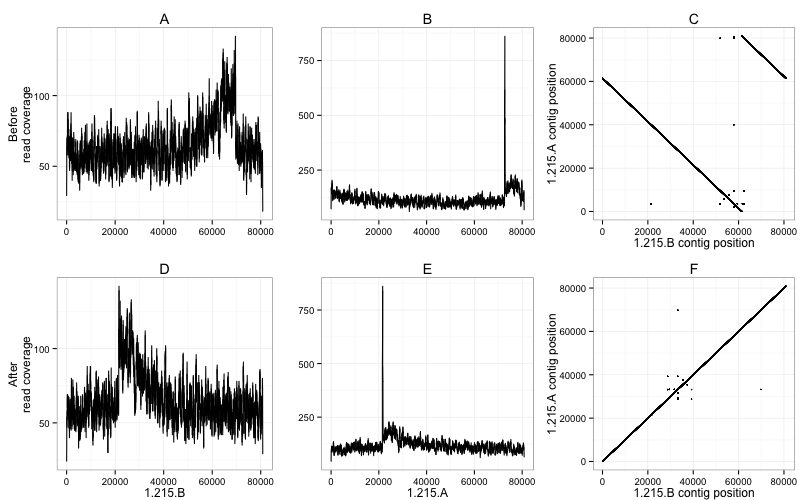

In [374]:
%%R -w 800 -h 500
out <- plot_grid("1.215", "B", "A")

In [375]:
%%R
png(filename = "coverage_panel_plots/1.215_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [376]:
phage_grp["1.233.B."]

'CNSv2.0:6'

## phage group 6

[1] "step1contig1/cov/1.233.B.step1.contig1.genomecoverage.txt"


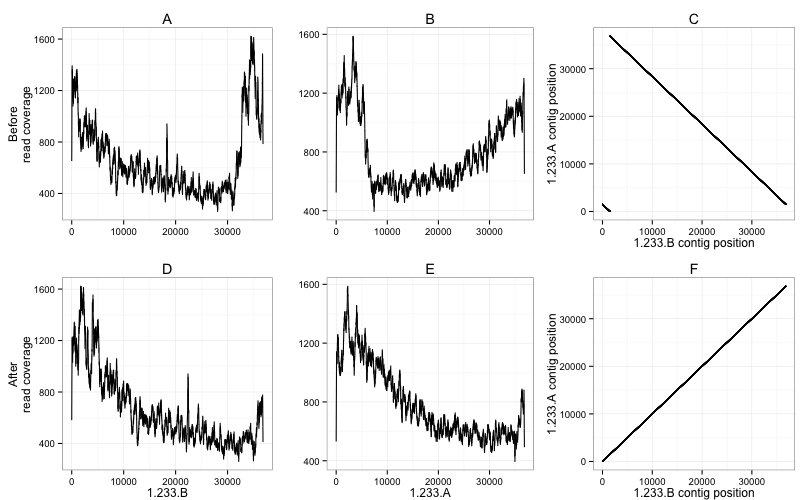

In [377]:
%%R -w 800 -h 500
out <- plot_grid("1.233", "B", "A")

In [378]:
%%R
png(filename = "coverage_panel_plots/1.233_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [379]:
phage_grp["1.237.B."]

'CNSv2.0:4'

## phage group 4

[1] "step1contig1/cov/1.237.B.step1.contig1.genomecoverage.txt"


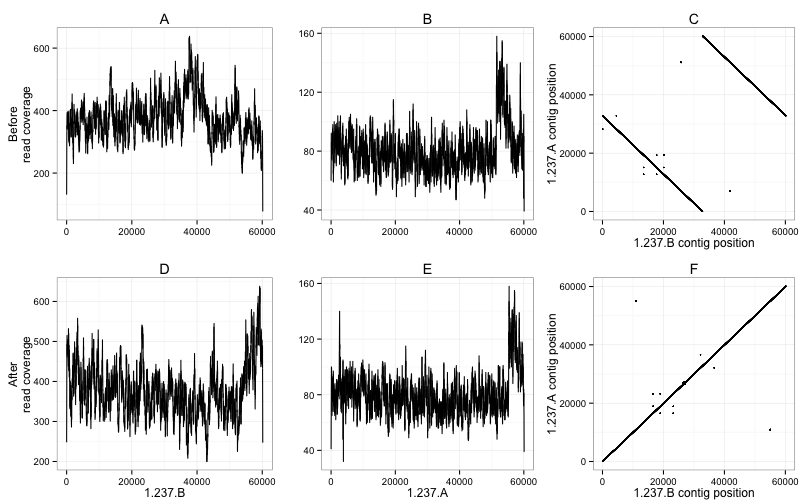

In [380]:
%%R -w 800 -h 500
out <- plot_grid("1.237", "B", "A")

In [381]:
%%R
png(filename = "coverage_panel_plots/1.237_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [382]:
phage_grp["1.238.A."]

'CNSv2.0:5'

## phage group 5

[1] "step1contig1/cov/1.238.A.step1.contig1.genomecoverage.txt"


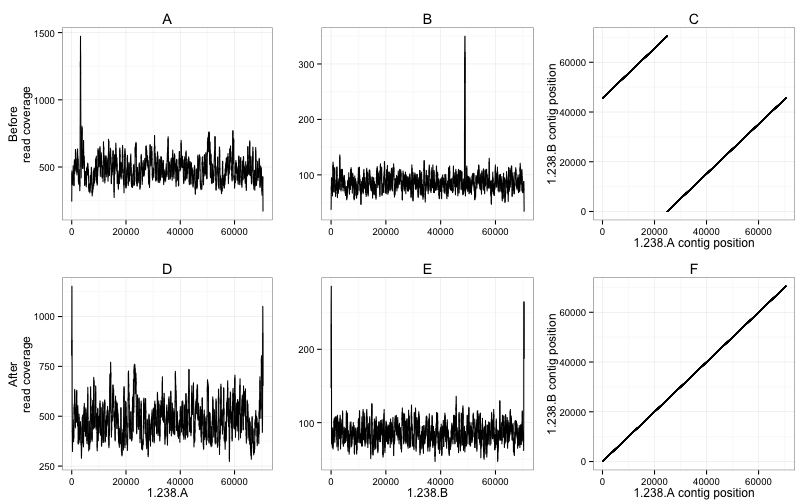

In [383]:
%%R -w 800 -h 500
out <- plot_grid("1.238", "A", "B")

In [384]:
%%R
png(filename = "coverage_panel_plots/1.238_AB_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [385]:
phage_grp["1.247.B."]

'CNSv2.0:9'

## phage group 9

[1] "step1contig1/cov/1.247.B.step1.contig1.genomecoverage.txt"


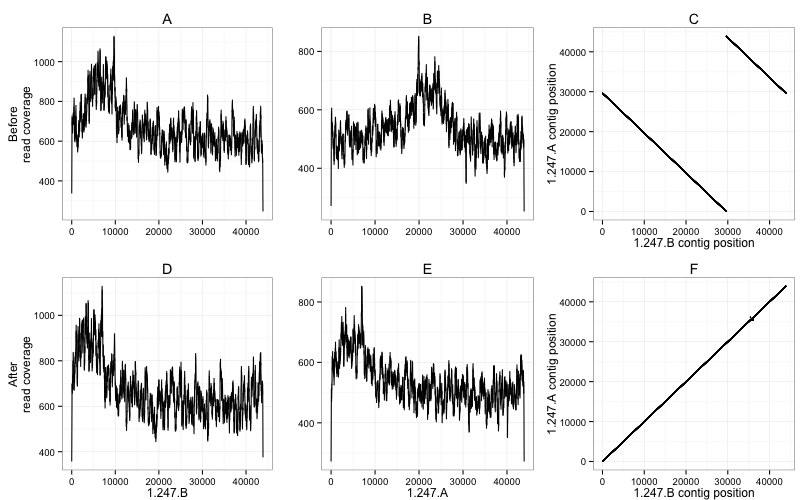

In [386]:
%%R -w 800 -h 500
out <- plot_grid("1.247", "B", "A")

In [387]:
%%R
png(filename = "coverage_panel_plots/1.247_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [388]:
phage_grp["1.249.B."]

'CNSv2.0:15'

## group 15

[1] "step1contig1/cov/1.249.B.step1.contig1.genomecoverage.txt"


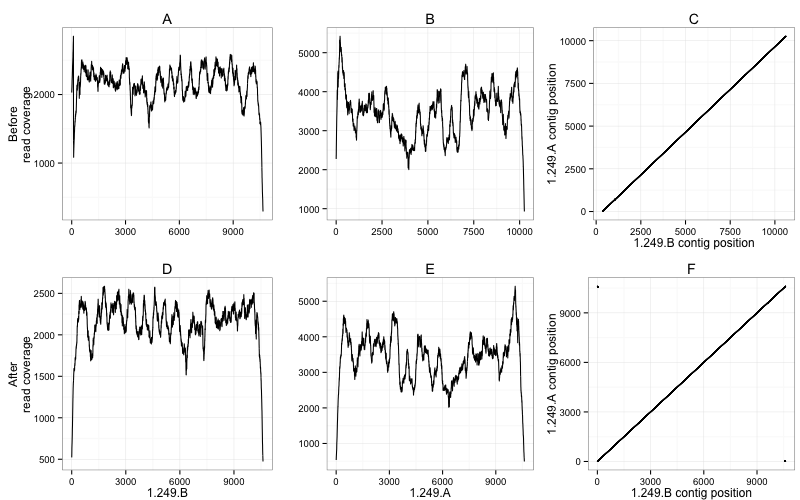

In [389]:
%%R -w 800 -h 500
out <- plot_grid("1.249", "B", "A")

In [390]:
%%R
png(filename = "coverage_panel_plots/1.249_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [391]:
phage_grp["1.263.B."]

'CNSv2.0:1'

## group 1

[1] "step1contig1/cov/1.263.B.step1.contig1.genomecoverage.txt"


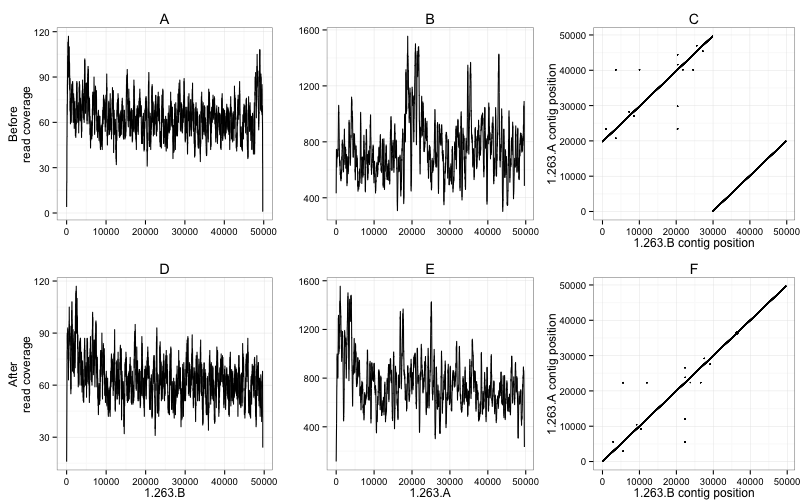

In [392]:
%%R -w 800 -h 500
out <- plot_grid("1.263", "B", "A")

In [393]:
%%R
png(filename = "coverage_panel_plots/1.263_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [394]:
phage_grp["1.268.A."]

'CNSv2.0:4'

## group 4

[1] "step1contig1/cov/1.268.A.step1.contig1.genomecoverage.txt"


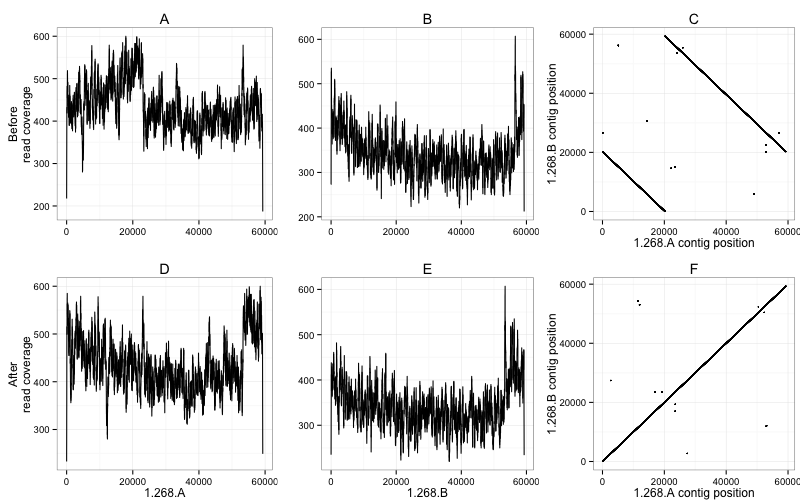

In [395]:
%%R -w 800 -h 500
out <- plot_grid("1.268", "A", "B")

In [396]:
%%R
png(filename = "coverage_panel_plots/1.268_AB_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


In [397]:
phage_grp["2.159.B."]

'CNSv2.0:17'

## group 17

[1] "step1contig1/cov/2.159.B.step1.contig1.genomecoverage.txt"


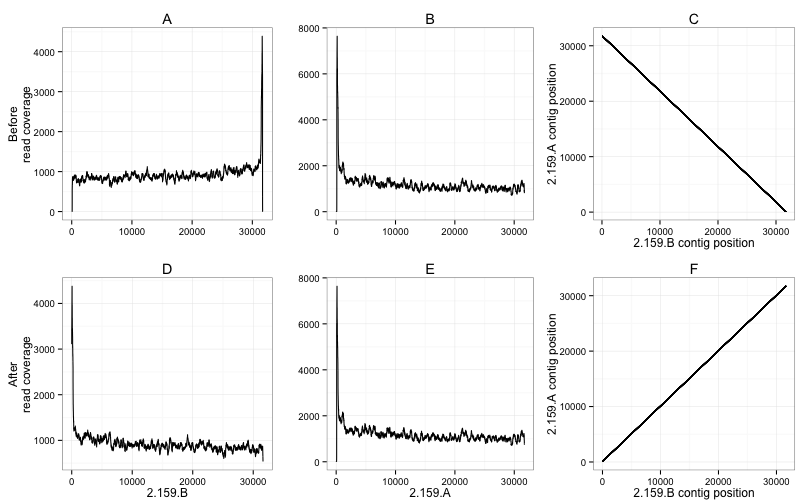

In [398]:
%%R -w 800 -h 500
out <- plot_grid("2.159", "B", "A")

In [399]:
%%R
png(filename = "coverage_panel_plots/2.159_BA_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                5 


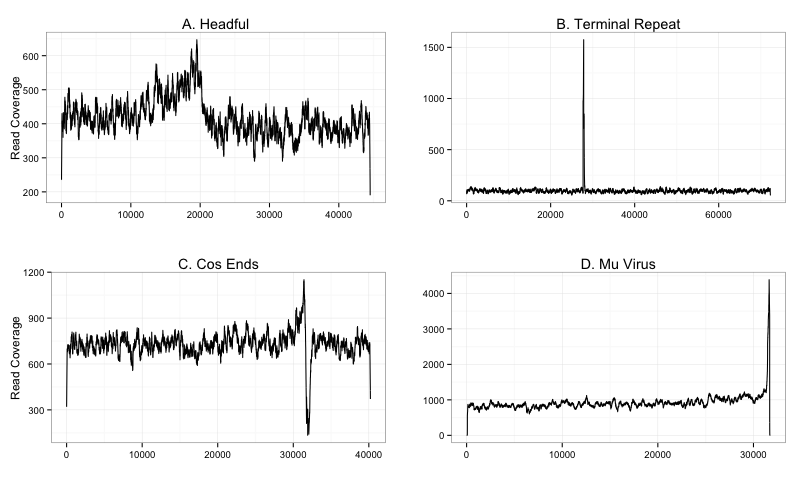

In [410]:
%%R -w 800
h <- "1.122.A"
t <- "1.188.A"
c <- "1.111.A"
m <- "2.159.B"

heb <- paste("step1contig1/cov/",h,".step1.contig1.genomecoverage.txt",sep="")
hea <- 
te <- paste("step1contig1/cov/",t,".step1.contig1.genomecoverage.txt",sep="")
co <- paste("step1contig1/cov/",c,".step1.contig1.genomecoverage.txt",sep="")
mu <- paste("step1contig1/cov/",m,".step1.contig1.genomecoverage.txt",sep="")

hb <- plot_coverage(he, "Headful") + labs(y="Read Coverage", 
                                                x="") + ggtitle("A. Headful")
#bpA <- bpA + theme(plot.margin=grid::unit(c(dph,rhs,bs,lhs), "pt"))

bpB <- plot_coverage(te, "Terminal Repeat") #+ theme(plot.margin=grid::unit(c(dph,rhs,bs,lhs), "pt")) 
bpB <- bpB + labs(x="", y="", title="B. Terminal Repeat")
apA <- plot_coverage(co, "Cos ends") + labs(y="Read Coverage", x="", title="C. Cos Ends")
#apA <- apA + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt"))

apB <- plot_coverage(mu, "Mu Virus") #+ theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt")) 
apB <- apB + labs(x="", y="", title="D. Mu Virus")

quad <- grid.arrange(hb, bpB, apA, apB,
             ncol = 2, nrow = 2, widths = c(8, 8), heights = c(9,9))

In [418]:
%%R
png(filename = "coverage_panel_plots/example_before_coverage.png", width=800, heigh=500, units='px')
plot(quad)
dev.off()

quartz_off_screen 
                5 


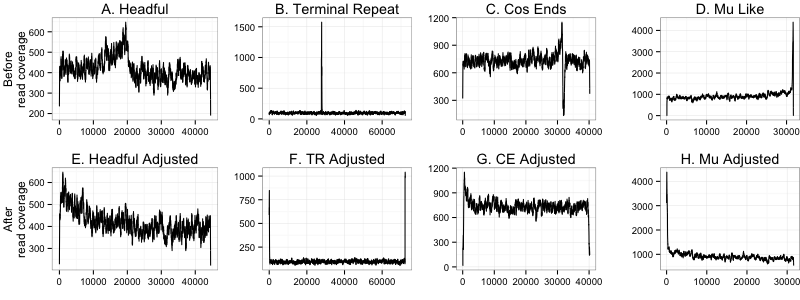

In [424]:
%%R -w 800 -h 300
h <- "1.122.A"
t <- "1.188.A"
c <- "1.111.A"
m <- "2.159.B"

heb <- paste("step1contig1/cov/",h,".step1.contig1.genomecoverage.txt",sep="")
hea <- paste("coverage_plots_post/",h,".final.clc.genomecoverage",sep="")
te <- paste("step1contig1/cov/",t,".step1.contig1.genomecoverage.txt",sep="")
tea <- paste("coverage_plots_post/",t,".final.clc.genomecoverage",sep="")
co <- paste("step1contig1/cov/",c,".step1.contig1.genomecoverage.txt",sep="")
coa <- paste("coverage_plots_post/",c,".final.clc.genomecoverage",sep="")
mu <- paste("step1contig1/cov/",m,".step1.contig1.genomecoverage.txt",sep="")
mua <- paste("coverage_plots_post/",m,".final.clc.genomecoverage",sep="")

hb <- plot_coverage(heb, "Headful") + labs(y="Before\nread coverage", 
                                                x="",
                                          title="A. Headful") + theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))
ha <- plot_coverage(hea, "Headful") + labs(y="After\nread coverage", x="", title="E. Headful Adjusted") + theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))

tb <- plot_coverage(te, "Terminal Repeat") + labs(x="", y="", title="B. Terminal Repeat")+ theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))
ta <- plot_coverage(tea, "Terminal Repeat") + labs(x="", y="", title = "F. TR Adjusted")+ theme(plot.margin=grid::unit(c(0,0,0,0), "pt"))

cb <- plot_coverage(co, "Cos ends") + labs(y="", x="", title="C. Cos Ends")+ theme(plot.margin=grid::unit(c(0,10,0,0), "pt"))
ca <- plot_coverage(coa, "Cos ends") + labs(y="", x="", title = "G. CE Adjusted")+ theme(plot.margin=grid::unit(c(0,10,0,0), "pt"))

mb <- plot_coverage(mu, "Mu Like") + labs(x="", y="", title="D. Mu Like")+ theme(plot.margin=grid::unit(c(0,0,0,10), "pt"))
ma <- plot_coverage(mua, "Mu Like") + labs(y="", x="", title="H. Mu Adjusted")+ theme(plot.margin=grid::unit(c(0,0,0,10), "pt"))
octo <- grid.arrange(hb, tb, cb, mb, ha, ta, ca, ma, 
             ncol = 4, nrow = 2, widths = c(9, 8, 8, 8), heights = c(10,10))

In [426]:
%%R
png(filename = "coverage_panel_plots/example_before_after_coverage.png", width=800, heigh=300, units='px')
plot(octo)
dev.off()

quartz_off_screen 
                7 
